## Introduction

This notebook investigates how the Monterey Bay Submarine Canyon affects wave dynamics and sediment transport.

This study aims to investigate the influence of submarine canyon topography on wave dynamics and nearshore currents, with a particular focus on the Monterey Bay Submarine Canyon. Specifically, the project will assess how local significant wave height is altered by the presence of the canyon and will estimate potential nearshore alongshore radiation stresses at and around the canyon head. These estimates will be used to explore the potential for sediment transport in this region.

To achieve this, we utilize model data from the Coastal Data Information Program (CDIP), specifically the Model Output and Processing (MOP) system. CDIP, based at the Scripps Institution of Oceanography, provides real-time and historical wave data along the U.S. Pacific coast. The MOP model integrates offshore buoy observations with nested numerical wave models, including the SWAN (Simulating Waves Nearshore) model, to generate high-resolution hindcasts and forecasts of wave conditions across coastal transects. This system is capable of resolving how wave energy is transformed as it propagates shoreward, making it particularly effective for analyzing complex coastal features such as submarine canyons, headlands, and reefs (O'Reilly et al., 2016). Data for this project will be extracted from CDIP MOP transects located near the head of the Monterey Canyon.

This submarine canyon is a dominant bathymetric feature within Monterey Bay and is known to significantly influence local hydrodynamics. Due to its steep and incised structure, the canyon can refract and focus incoming wave energy, potentially altering both wave height and direction in the nearshore zone (Auad et al., 2006; Shepard, 1972). Such modifications to wave fields are known to affect nearshore current patterns, including the formation and intensification of alongshore currents that drive sediment transport (Barnard et al., 2012; Lentz & Fewings, 2012). Understanding how these changes affect current speeds and sediment dynamics is crucial for coastal process studies.

Using the significant wave height (Hs) data from these transects, we will calculate alongshore current velocities and therefore sediment transport indices. By estimating these current velocities, we can make inferences about sediment transport potential in the vicinity of the canyon head. Submarine canyons like Monterey Canyon can act as sediment traps or conduits, influencing longshore sediment fluxes and disrupting littoral drift (Normark & Carlson, 2003; Puig et al., 2014). These processes can lead to localized erosion or accretion, impacting beach stability and nearshore habitat structure.

The significance of this research lies in its contribution to our understanding of how submarine canyons affect sediment movement and coastal morphology. Sediment transport processes play a critical role in shaping shorelines, maintaining benthic habitats, and supporting biological productivity (Nittrouer & Wright, 1994). In particular, submarine canyons serve as key conduits for material exchange between shallow coastal areas and deeper marine environments, often acting as sediment bypass systems under certain wave and current conditions (Palanques et al., 2006; Harris & Whiteway, 2011). Ultimately, this project seeks to determine whether a correlation exists between significant wave height/direction and calculated alongshore current velocities in the Monterey Canyon region. Identifying such a relationship could provide valuable insights into sediment transport mechanisms in canyon-influenced coastal systems and improve predictive capabilities for coastal management and conservation planning.

## Methods

1. I will be pulling data from the CDIP MOP model from Monterey county transect map to select points in the vicinity of the submarine canyon head. This will be to analyze how alongshore radiation stress(waveSxy) varies monthly throughout the year as well as how well corelated significant wave height(waveHs) and direction(waveDp) are with this variable. 

2. Specifically I chose these transect points (MO886 - MO891) from 100m south of the southern rim of the canyon head to 100m north of the northern rim of the canyon head (MO896 - MO899). I’ll first plot monthly radiation stress variability over the last year for each of these transects to see seasonal trends. Then I’d like to compare these trends with a plot of significant wave height and direction. Picking out where largest alongshore radiation stress is for each side of the harbor and if it lines up with either the largest wave height or ideal direction(45 degress from beach angle). 

3. After looking at broader trends I’d like to zero in on the largest recorded significant wave height over the past year, including the build up and the tapering for each transect point. For this 2025 study this happens to be the 24 hour period from March 18th to the 19th where wave heights peaked out at ~3.5m.   

4. I'll then take this cropped storm data and plot the significant wave height over the alongshore radiation stress. This is a proxy for the alongshore current speed/sediment transport. 

5. Finally I ran a  paired T test on the North transects vs the South transects to see if they are 1. Statistically significant for alongshore radiation stress and 2. Significant wave height and direction. This could potentially how each of these littoral cells (north Monterey and south Monterey) are interacting with the canyon head tributaries. 



## Map of the chosen transect locations

/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


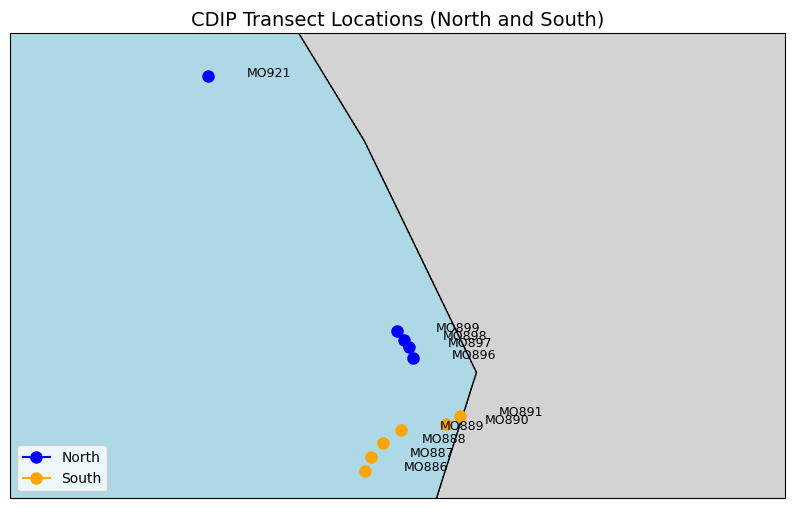

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Correct coordinates for each transect
transect_coords = {
    # North
    'MO896': (36.8080, -121.7980),
    'MO897': (36.8095, -121.7985),
    'MO898': (36.8104, -121.7991),
    'MO899': (36.8115, -121.8000),
    'MO921': (36.8444, -121.8244),
    # South
    'MO886': (36.7935, -121.8042),
    'MO887': (36.7953, -121.8034),
    'MO888': (36.7971, -121.8019),
    'MO889': (36.7988, -121.79959),
    'MO890': (36.7996, -121.7937),
    'MO891': (36.8006, -121.7919)
}

north_transects = ['MO896', 'MO897', 'MO898', 'MO899', 'MO921']
south_transects = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']

# Set up the map
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Plot transects
for code in north_transects:
    lat, lon = transect_coords[code]
    ax.plot(lon, lat, marker='o', color='blue', markersize=8, label='North' if code == 'MO896' else "")
    ax.text(lon + 0.005, lat, code, fontsize=9)

for code in south_transects:
    lat, lon = transect_coords[code]
    ax.plot(lon, lat, marker='o', color='orange', markersize=8, label='South' if code == 'MO886' else "")
    ax.text(lon + 0.005, lat, code, fontsize=9)

# Set extent to focus around Monterey Bay
ax.set_extent([-121.85, -121.75, 36.79, 36.85])

# Add legend and title
ax.legend(loc='lower left')
plt.title("CDIP Transect Locations (North and South)", fontsize=14)
plt.show()


## Visualization of Wave Height(waveHs) and Alongshore Radiation Stress (Sxy) and Wave Direction (waveDm) North side of harbor during a storm event

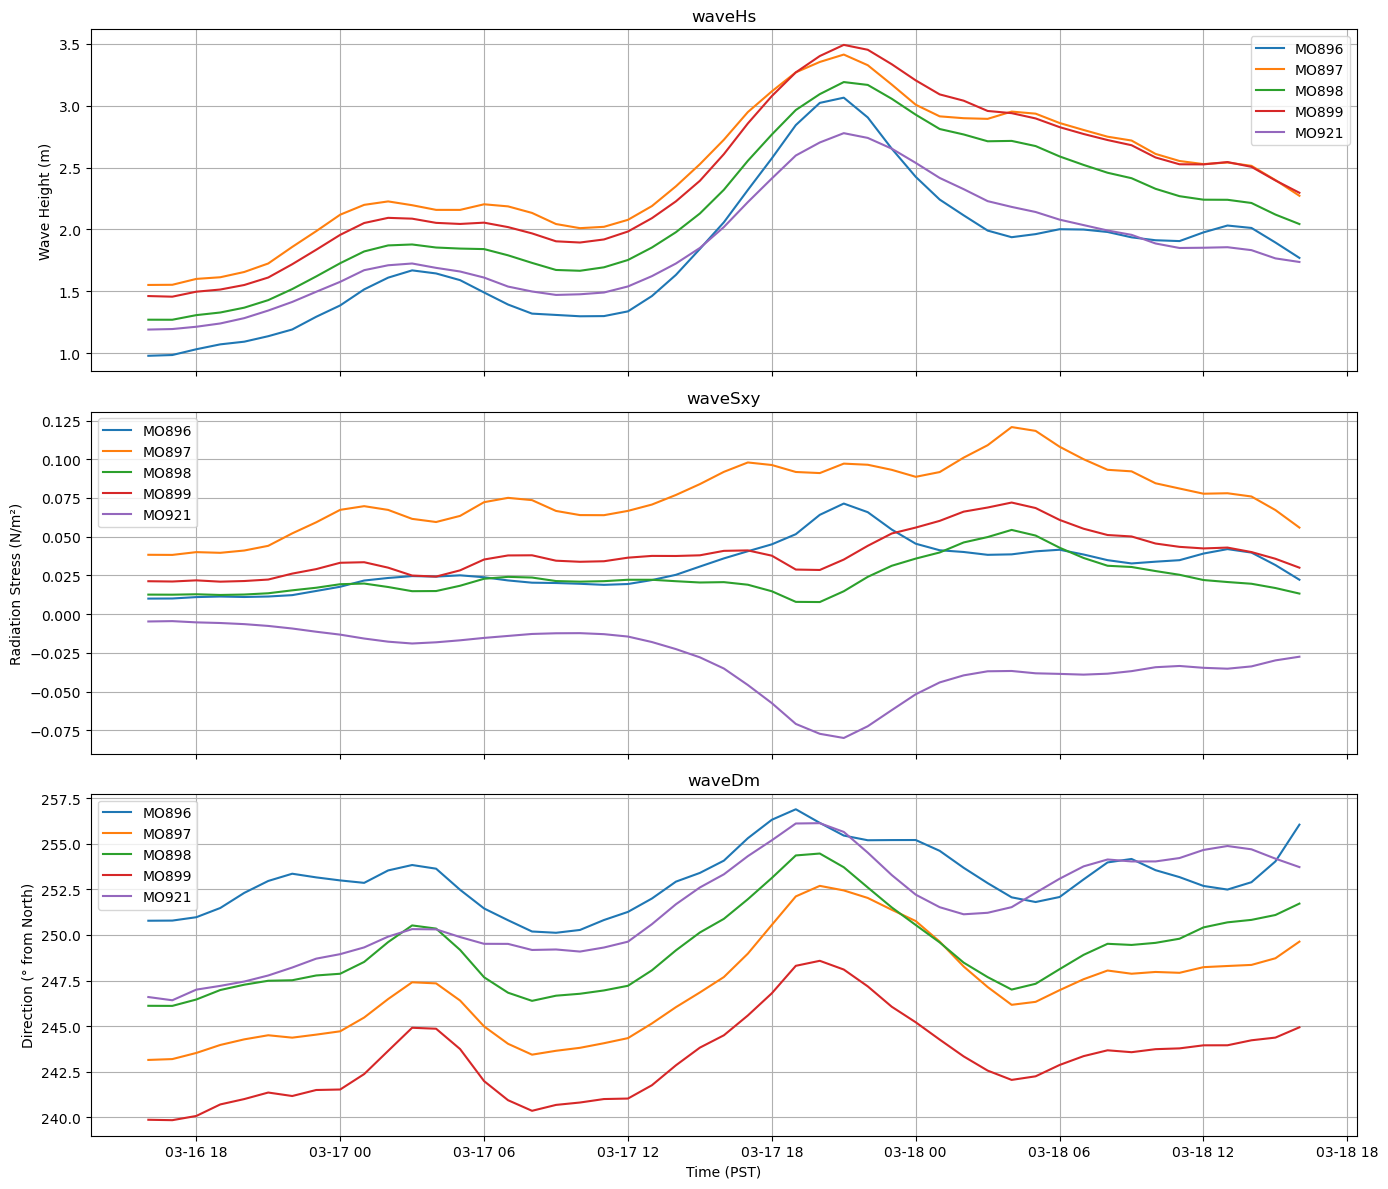

In [36]:
import matplotlib.pyplot as plt
import sys
sys.path.append("wave")
import CDIP as CDIP

# Define inputs
transects = ['MO896', 'MO897', 'MO898', 'MO899', 'MO921']
variables = ['waveHs', 'waveSxy', 'waveDm']
start_date = "2025-03-17"
end_date = "2025-03-19"

# Y-axis labels 
y_labels = {
    'waveHs': 'Wave Height (m)',
    'waveSxy': 'Radiation Stress (N/m²)',
    'waveDm': 'Direction (° from North)'
}

data = CDIP.load_cdip_data(transects, variables, start_date, end_date)
fig, axes = plt.subplots(len(variables), 1, figsize=(14, 12), sharex=True)
for i, var in enumerate(variables):
    ax = axes[i]
    if var in data:
        for transect in transects:
            if transect in data[var]:
                ax.plot(data[var][transect], label=transect)
    ax.set_title(var)
    ax.set_ylabel(y_labels.get(var, "Value"))  
    ax.grid(True)
    ax.legend()
axes[-1].set_xlabel("Time (PST)")
plt.tight_layout()
plt.show()



## Visualization of Wave Height(waveHs) and Alongshore Radiation Stress (Sxy) and Wave Direction (waveDm) South side of harbor during a storm event

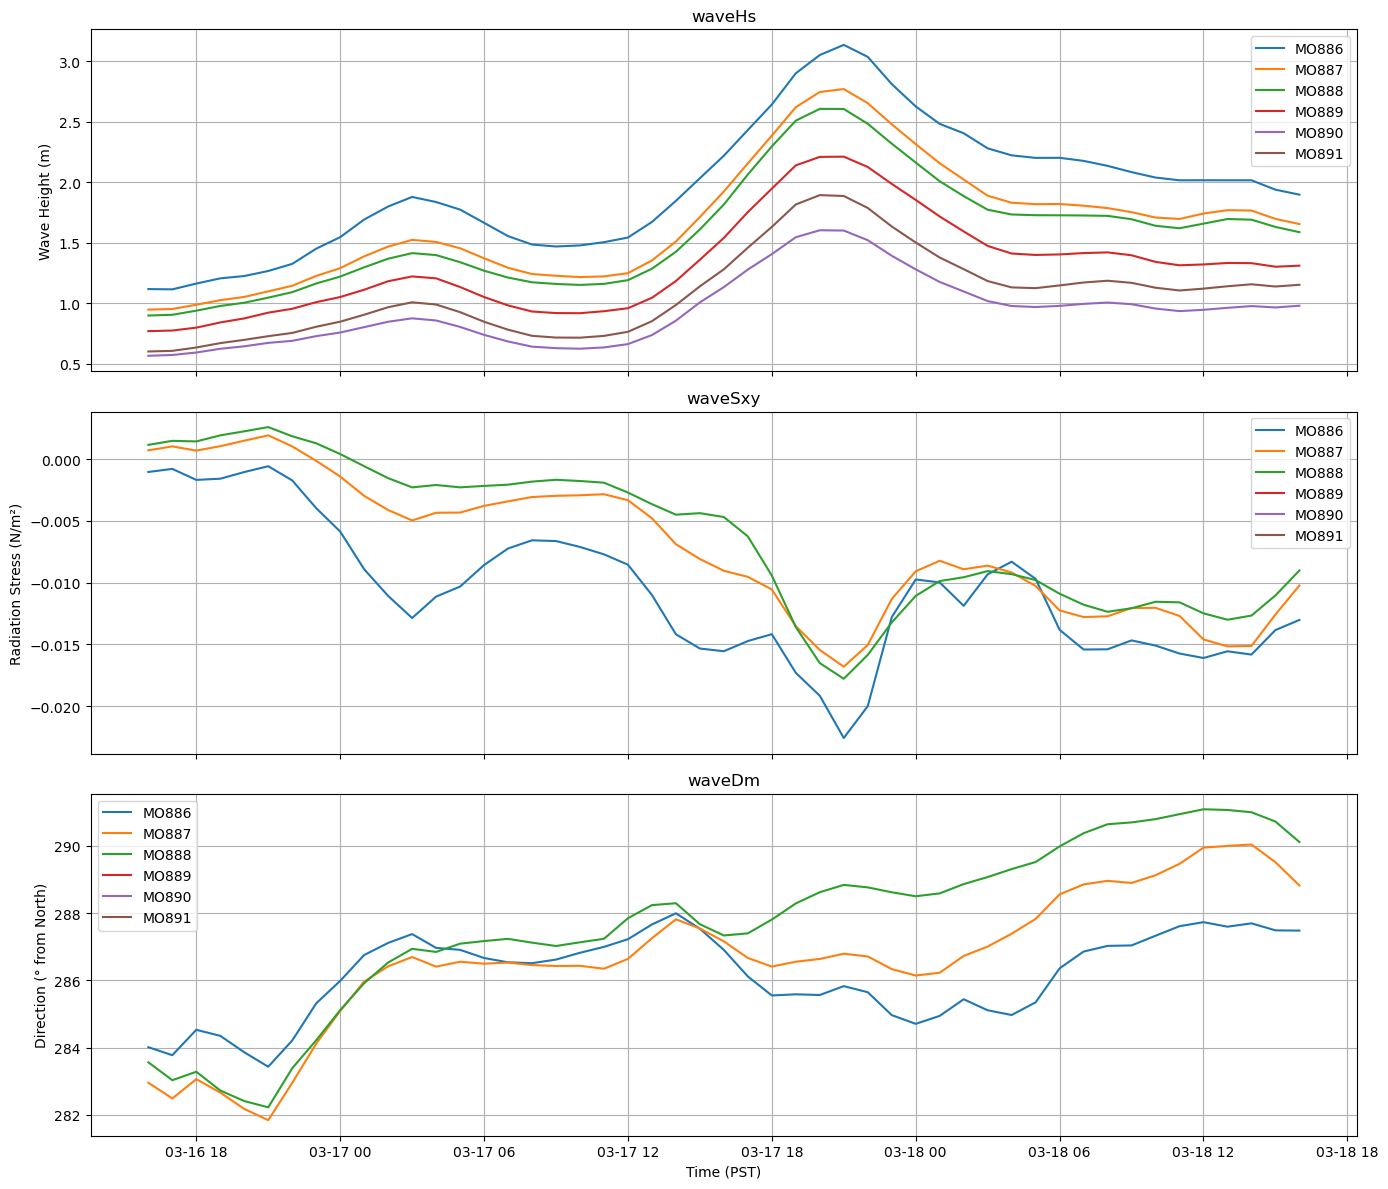

In [34]:
# Define inputs
transects = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']
variables = ['waveHs', 'waveSxy', 'waveDm']
y_labels = {
    'waveHs': 'Wave Height (m)',
    'waveSxy': 'Radiation Stress (N/m²)',
    'waveDm': 'Direction (° from North)'
}
start_date = "2025-03-17"
end_date = "2025-03-19"

# Load data using the universal loader
data = CDIP.load_cdip_data(transects, variables, start_date, end_date)


fig, axes = plt.subplots(len(variables), 1, figsize=(14, 12), sharex=True)
for i, var in enumerate(variables):
    ax = axes[i]
    if var in data:
        for transect in transects:
            if transect in data[var]:
                ax.plot(data[var][transect], label=transect)
    ax.set_title(var)
    ax.set_ylabel(y_labels.get(var, "Value")) 
    ax.grid(True)
    ax.legend()


axes[-1].set_xlabel("Time (PST)")
plt.tight_layout()
plt.show()


## Combining both sides to visually see how they differ

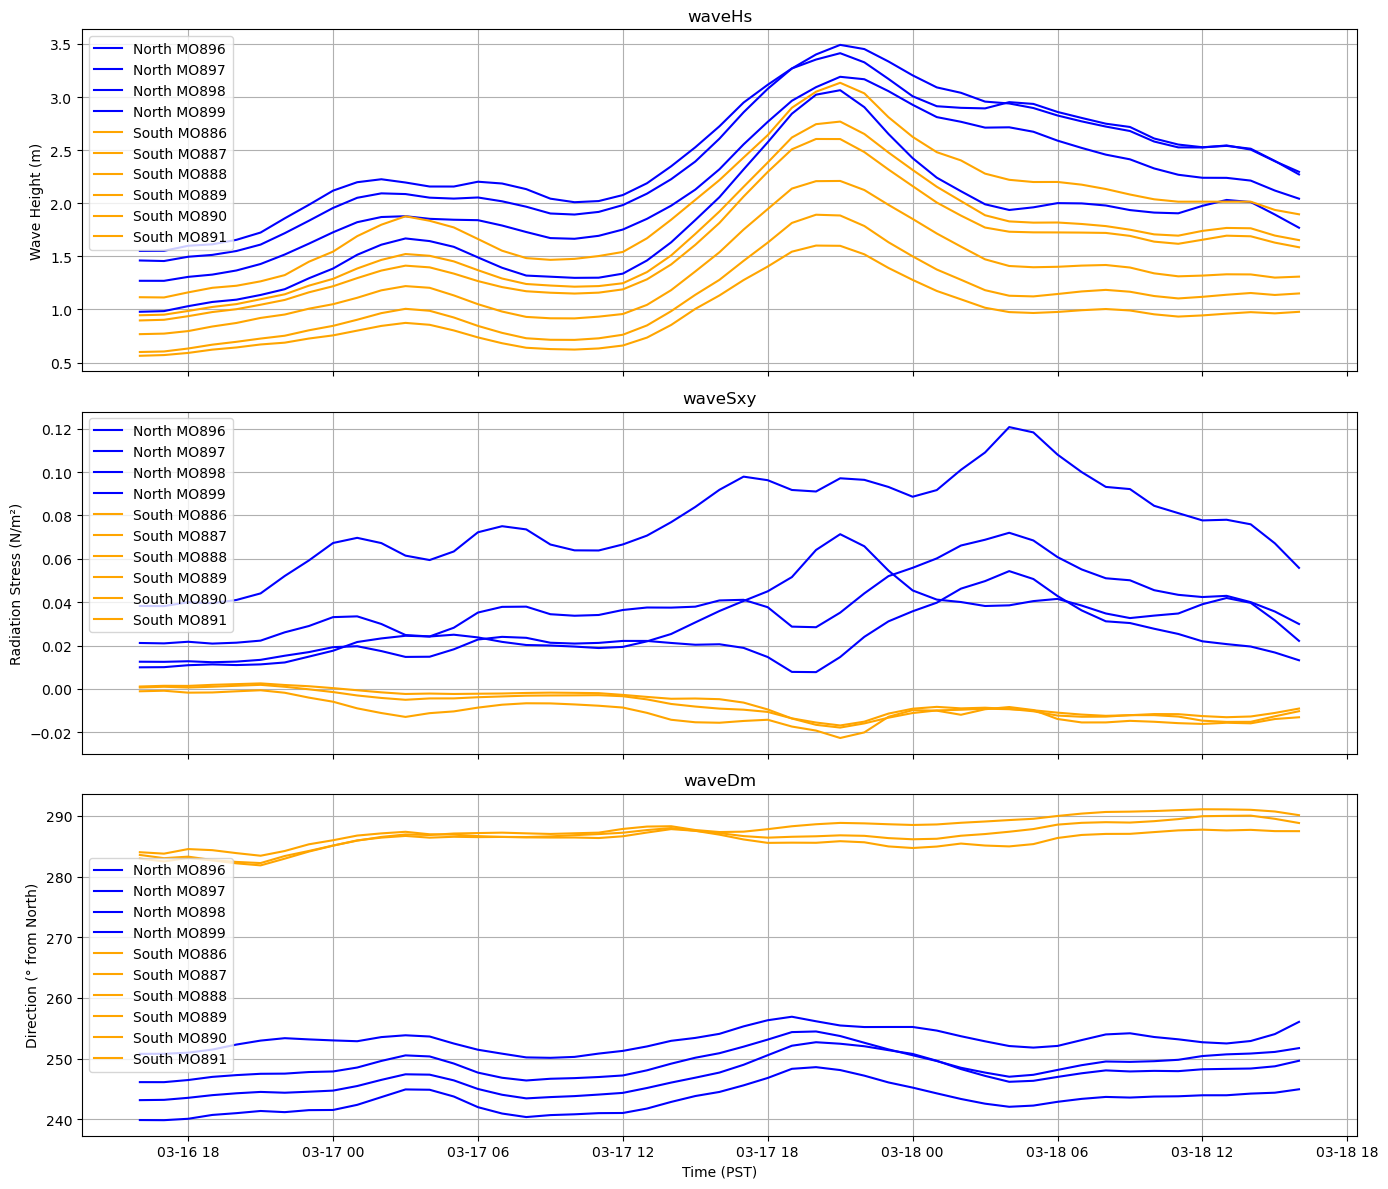

In [30]:
north_locs = ['MO896', 'MO897', 'MO898', 'MO899']
south_locs = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']
all_locs = north_locs + south_locs

variables = ['waveHs', 'waveSxy', 'waveDm']
y_labels = {
    'waveHs': 'Wave Height (m)',
    'waveSxy': 'Radiation Stress (N/m²)',
    'waveDm': 'Direction (° from North)'
}
start_date = "2025-03-17"
end_date = "2025-03-19"

# Load data
data = CDIP.load_cdip_data(all_locs, variables, start_date, end_date)


fig, axes = plt.subplots(len(variables), 1, figsize=(14, 12), sharex=True)
for i, var in enumerate(variables):
    ax = axes[i]
    if var in data:
        # North transects (blue)
        for loc in north_locs:
            if loc in data[var]:
                ax.plot(data[var][loc], label=f"North {loc}", color='blue')
        # South transects (orange)
        for loc in south_locs:
            if loc in data[var]:
                ax.plot(data[var][loc], label=f"South {loc}", color='orange')

    ax.set_title(var)
    ax.set_ylabel(y_labels.get(var, "Value"))
    ax.grid(True)
    ax.legend()
axes[-1].set_xlabel("Time (PST)")
plt.tight_layout()
plt.show()

 

## Paired T test

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel

transect1 = 'MO921'
transect2 = 'MO897'
variables = ['waveHs', 'waveSxy', 'waveDm']
start_date = "2025-03-17"
end_date = "2025-03-19"

# Load data 
data = CDIP.load_cdip_data([transect1, transect2], variables, start_date, end_date)

# Perform paired t-tests
for var in variables:
    if var in data and transect1 in data[var] and transect2 in data[var]:
        # Join the two time series on common timestamps (inner join)
        series1 = data[var][transect1]
        series2 = data[var][transect2]
        df = pd.concat([series1, series2], axis=1, keys=[transect1, transect2]).dropna()

        if len(df) > 1:
            t_stat, p_value = ttest_rel(df[transect1], df[transect2])
            print(f"\nPaired t-test for {var} ({transect1} vs {transect2}):")
            print("T-statistic:", t_stat)
            print("P-value:", p_value)
            print("Sample size:", len(df))
        else:
            print(f"\nNot enough paired data for {var} ({transect1} vs {transect2}).")
    else:
        print(f"\nMissing data for {var} in one or both transects.")



Paired t-test for waveHs (MO921 vs MO897):
T-statistic: -33.06308249719325
P-value: 1.10005227151224e-34
Sample size: 49

Paired t-test for waveSxy (MO921 vs MO897):
T-statistic: -19.3789846412428
P-value: 2.4449619297870295e-24
Sample size: 49

Paired t-test for waveDm (MO921 vs MO897):
T-statistic: 22.698895501468176
P-value: 2.5747946115116e-27
Sample size: 49


## Results

Analysis of wave refraction patterns near the Monterey Canyon head reveals that canyon topography exerts a substantial influence on local significant wave heights, particularly in regions south of the harbor mouth. The presence of the canyon induces complex wave transformations, including focusing and shadowing effects, which result in spatial variability in wave energy distribution across adjacent coastal transects.

This variability in wave energy directly impacts the magnitude and direction of alongshore radiation stress. As a result, sites located near the canyon head exhibit significantly different alongshore radiation stress vectors compared to sites farther from the canyon influence. These differences are not limited to individual high-energy swell events; rather, they persist throughout the annual wave climate. Statistical analysis confirms that both the magnitude and orientation of alongshore radiation stress and wave direction differ consistently and significantly between canyon-influenced and non-canyon-influenced sites.

## Conclusion

Although the CDIP MOP model incorporates submarine canyon bathymetry, it appears to rely on outdated or low-resolution bathymetric data for the Monterey Bay region. This discrepancy is evident in the model’s prediction of wave refraction patterns, which extend northward beyond the actual influence of the canyon, reaching areas near the Pajaro River mouth. In reality, the northernmost tributary of the Monterey Canyon lies only approximately 100 meters north of the northern harbor jetty. Consequently, the model likely overestimates the spatial extent of wave energy refraction caused by the canyon, resulting in inaccurate predictions of diffracted swell angles and, subsequently, erroneous estimations of alongshore radiation stress direction.

Despite these limitations, the model outputs offer valuable insights into the broader sediment dynamics at the canyon head. The observed accumulation of sediment along the rims of the tributaries may be partially explained by the altered nearshore wave energy distribution induced by the canyon topography. However, this does not fully account for the episodic “flushing events” observed in the region, where sediment is rapidly transported offshore and downslope.

These findings suggest that while predominant northwest swell conditions are important, they may not be the sole drivers of local alongshore currents and sediment redistribution. It is plausible that other mechanisms—such as local rip currents due to wave imbalences—play a role in modulating sediment transport and initiating flushing events at the canyon head. 


## Future Work

An idea for future work would be to somehow add the changing bathymetry from consistent updated surveys to this model to more accurately predict the correlation of wave height/direction to alongshore current speeds. Certain bathymetry shapes could diminish or enhance near alongshore velocities therefore sediment resuspension/transport. 

Another path to investigate is if Orzeck’s updated CERC equation holds the true driver of what causes these frequent “flushing events” into the canyon head. Theoretically if this is true then potentially it has nothing to do with a critical shear slope of the sediment rather the long pulses of high velocity alongshore currents due to large pressure gradient that are causing these “flushing events”.

## References

Auad, G., Hendershott, M. C., & Winant, C. D. (2006). Modeling the coastal circulation off southern California: A comparison of objective mapping with coastal buoy and TOPEX/POSEIDON data. Journal of Physical Oceanography, 36(4), 661–674.

Barnard, P. L., Erikson, L. H., & Hanson, H. (2012). Dynamically downscaled projections of sea level rise impacts on southern California beaches. Climatic Change, 109(1), 261–278.

Harris, P. T., & Whiteway, T. (2011). Global distribution of large submarine canyons: Geomorphic differences between active and passive continental margins. Marine Geology, 285(1-4), 69–86.

Lentz, S. J., & Fewings, M. R. (2012). The wind- and wave-driven inner-shelf circulation. Annual Review of Marine Science, 4, 317–343.

Nittrouer, C. A., & Wright, L. D. (1994). Transport of particles across continental shelves. Reviews of Geophysics, 32(1), 85–113.

Normark, W. R., & Carlson, P. R. (2003). Giant submarine canyons: Is size any clue to their importance in the rock record? Special Papers-Geological Society of America, 370, 175–190.

O'Reilly, W. C., Thomas, J. L., Seymour, R. J., & Guza, R. T. (2016). Predicting coastal wave energy using the Coastal Data Information Program (CDIP) model. Coastal Engineering, 114, 57–70.

Palanques, A., Puig, P., Guillén, J., et al. (2006). Storm-driven sediment transport in submarine canyons of the NW Mediterranean Sea. Marine Geology, 234(1-4), 143–156.

Puig, P., et al. (2014). Sediment transport processes in submarine canyons: Implications for the deep sea. Nature Geoscience, 7(10), 660–664.

Shepard, F. P. (1972). Submarine canyons: Multiple causes and long-time persistence. American Association of Petroleum Geologists Bulletin, 56(5), 831–855.